<a href="https://colab.research.google.com/github/estatwesley/proba/blob/main/Arquivo2_TProbabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exp-01

*Considere uma urna inicialmente com 2 bolas verdes, 1 bola vermelha e 1 bola preta. O jogador **A** participa do seguinte jogo. Em cada rodada ele retira 1 bola da urna observa a cor e devolve. Se sair verde ele ganha 1 real a ideia se basei em fazer o jogador jogar um número de rodadas suficientemente grande para que o lucro seja positivo mosntrando ao fim o resultado na tela ou em um gráfico*

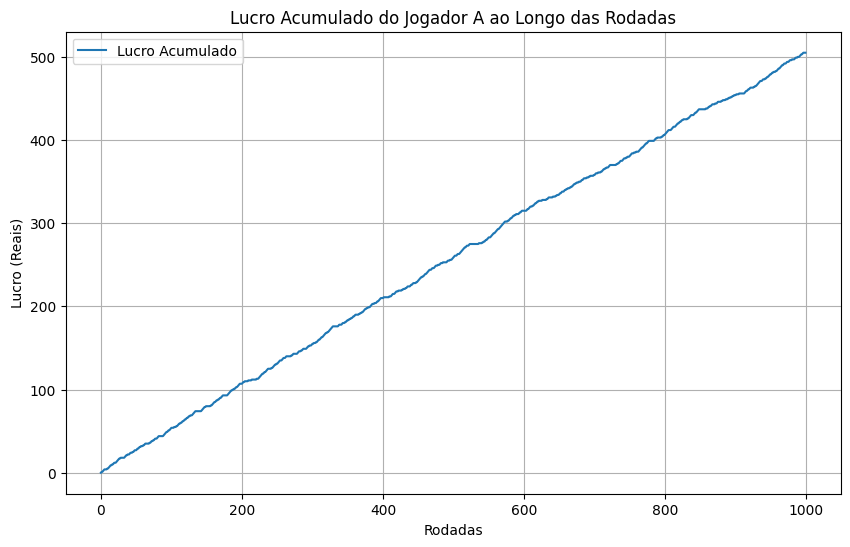

In [5]:
import random
import matplotlib.pyplot as plt

# Configurações do jogo
bolas = ['verde', 'verde', 'vermelha', 'preta']
num_rodadas = 1000  # Número de rodadas do jogo

# Função para simular o jogo
def simular_jogo(num_rodadas):
    lucro_acumulado = []
    lucro = 0
    for _ in range(num_rodadas):
        bola_sorteada = random.choice(bolas)
        if bola_sorteada == 'verde':
            lucro += 1
        lucro_acumulado.append(lucro)
    return lucro_acumulado

# Simulação do jogo
resultados = simular_jogo(num_rodadas)

# Plotar o resultado
plt.figure(figsize=(10, 6))
plt.plot(resultados, label='Lucro Acumulado')
plt.xlabel('Rodadas')
plt.ylabel('Lucro (Reais)')
plt.title('Lucro Acumulado do Jogador A ao Longo das Rodadas')
plt.legend()
plt.grid(True)
plt.show()


# exp-02

*Ruína do Jogador*

Duração média: 99.87432, Probabilidade de ruína: 0.49861


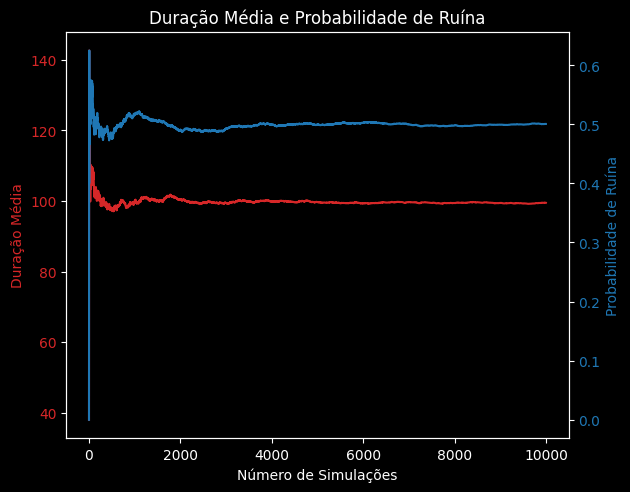

Duração média (jogador): 19.4526
Probabilidade de ruína (jogador): 0.8936


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para simular um único passeio aleatório
def ruina_jogador(p=0.5, c=10, m=20):
    """
    Simula um único passeio aleatório até o jogador alcançar a ruína (capital zero) ou a meta (capital m).

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.

    Retorna:
    int: Tempo total do passeio até a ruína ou a meta.
    """
    s = c
    t = 0
    while 0 < s < m:
        s += 1 if np.random.uniform() < p else -1
        t += 1
    return t

# Função para calcular a duração média e a probabilidade de ruína
def media_ruina_tempo(p=0.6, c=10, m=20, n=100000):
    """
    Simula múltiplos passeios aleatórios e calcula a duração média do jogo e a probabilidade de ruína.

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.
    n (int): Número de simulações.

    Retorna:
    tuple: Duração média do jogo e probabilidade de ruína.
    """
    ruinas = 0
    duracoes = np.zeros(n)

    for i in range(n):
        s = c
        t = 0
        while 0 < s < m:
            s += 1 if np.random.uniform() < p else -1
            t += 1
        duracoes[i] = t
        if s == 0:
            ruinas += 1

    duracao_media = np.mean(duracoes)
    prob_ruina = ruinas / n
    return duracao_media, prob_ruina

# Função para plotar a média da duração e a probabilidade de ruína ao longo das simulações
def plot_duracao_ruina(p=0.5, c=10, m=20, n=10000):
    """
    Plota a duração média e a probabilidade de ruína ao longo das simulações.

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.
    n (int): Número de simulações.
    """
    ruinas = 0
    duracoes = np.zeros(n)
    medias = np.zeros(n)
    ruinas_acumuladas = np.zeros(n)

    for i in range(n):
        s = c
        t = 0
        while 0 < s < m:
            s += 1 if np.random.uniform() < p else -1
            t += 1
        duracoes[i] = t
        if s == 0:
            ruinas += 1
        medias[i] = np.mean(duracoes[:i+1])
        ruinas_acumuladas[i] = ruinas / (i + 1)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Número de Simulações')
    ax1.set_ylabel('Duração Média', color=color)
    ax1.plot(range(n), medias, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Probabilidade de Ruína', color=color)
    ax2.plot(range(n), ruinas_acumuladas, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title("Duração Média e Probabilidade de Ruína")
    plt.show()

# Função para simular a ruína do jogador com diferentes recompensas e penalidades
def ruina_jogador_diferentes_recompensas(p=0.1, k=10, l=-2, c=20, m=40, n=10000):
    """
    Simula a ruína do jogador com diferentes recompensas e penalidades em cada rodada.

    Parâmetros:
    p (float): Probabilidade de sucesso (incrementar capital).
    k (int): Incremento do capital em caso de sucesso.
    l (int): Decremento do capital em caso de falha.
    c (int): Capital inicial.
    m (int): Meta de capital do jogador.
    n (int): Número de simulações.

    Retorna:
    tuple: Duração média do jogo e probabilidade de ruína.
    """
    ruinas = 0
    duracoes = np.zeros(n)

    for i in range(n):
        s = c
        t = 0
        while 0 < s < m:
            s += k if np.random.uniform() < p else l
            t += 1
        duracoes[i] = t
        if s == 0:
            ruinas += 1

    duracao_media = np.mean(duracoes)
    prob_ruina = ruinas / n
    return duracao_media, prob_ruina

# Exemplos de uso das funções

# Duracao média e probabilidade de ruína para um passeio aleatório
duracao, prob_ruina = media_ruina_tempo(p=0.5, c=10, m=20, n=100000)
print(f"Duração média: {duracao}, Probabilidade de ruína: {prob_ruina}")

# Plotando a duração média e probabilidade de ruína ao longo das simulações
plot_duracao_ruina(p=0.5, c=10, m=20, n=10000)

# Simulação da ruína do jogador com diferentes recompensas e penalidades
duracao_jogador, prob_ruina_jogador = ruina_jogador_diferentes_recompensas(p=0.1, k=10, l=-2, c=20, m=40, n=10000)
print(f"Duração média (jogador): {duracao_jogador}")
print(f"Probabilidade de ruína (jogador): {prob_ruina_jogador}")


# exp-03
*Caeias de Markov*

In [10]:
import numpy as np

# Definir a matriz de transição
matriz_prob = [[0.3, 0.6, 0.1, 0.0, 0.0, 0.0, 0.0],
               [0.3, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.8, 0.1, 0.1, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.6, 0.4, 0.0],
               [0.0, 0.8, 0.0, 0.0, 0.1, 0.0, 0.1],
               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

# Função para simular o tempo de absorção até um estado de absorção
def calcular_tempo_medio(n_simulacoes, estado_inicial, estado_desejado):
    tempos = []
    for _ in range(n_simulacoes):
        estado_atual = estado_inicial
        tempo = 0
        while estado_atual != estado_desejado:
            prob = np.random.rand()
            acumulado = 0
            for i, p in enumerate(matriz_prob[estado_atual]):
                acumulado += p
                if prob <= acumulado:
                    estado_atual = i
                    break
            tempo += 1
        tempos.append(tempo)
    return np.mean(tempos)

# Número de simulações
n_simulacoes = 10**5

# Calcular o tempo médio da trajetória de 1 ao 6
tempo_medio_1_a_6 = calcular_tempo_medio(n_simulacoes, 0, 5) # estados são indexados a partir de 0
print(f"Tempo médio da trajetória de 1 ao 6: {tempo_medio_1_a_6}")

# Calcular o tempo médio da trajetória de 1 ao 7
tempo_medio_1_a_7 = calcular_tempo_medio(n_simulacoes, 0, 6) # estados são indexados a partir de 0
print(f"Tempo médio da trajetória de 1 ao 7: {tempo_medio_1_a_7}")


Tempo médio da trajetória de 1 ao 6: 60.42145
Tempo médio da trajetória de 1 ao 7: 581.54368
